In [3]:
# Convert csv into a pandas dataframe and check the first 10 rows

import pandas as pd

df = pd.read_csv('../docs/s3dis_train_metrics_csc.csv')
df.head(10)

,epoch,Loss,Accuracy,IoU,Time (s)
0,1,0.804555,0.746759,0.412223,156.228675
1,2,0.530238,0.837408,0.458412,103.174633
2,3,0.442936,0.860932,0.503015,113.576657
3,4,0.385726,0.877901,0.537058,130.064886
4,5,0.344307,0.889923,0.584243,110.552009
5,6,0.319725,0.896748,0.641308,125.364938
6,7,0.286039,0.906981,0.600955,116.031956
7,8,0.266239,0.913416,0.679147,122.699435
8,9,0.247518,0.919602,0.639499,143.449469
9,10,0.249050,0.919217,0.681194,121.885556


In [27]:
time_sum = df['Time (s)'].sum()
time_sum

6141.123196957167

In [28]:
df_local = pd.read_csv('../docs/local_s3dis_train_metrics.csv')
time_sum_local = df_local['Time (s)'].sum()
time_sum_local

143433.95328999986

In [29]:
time_sum/time_sum_local

0.04281498945051613

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def get_df_name(file_path):
    file_name_with_ext = os.path.basename(file_path)
    file_name_without_ext = os.path.splitext(file_name_with_ext)[0]
    result = file_name_without_ext.split('_metrics')[0]
    return result

In [3]:
# Convert csvs to dataframes
def csv_to_df(file_paths):
    dataframes = {}
    for file_path in file_paths:
        try:
            df = pd.read_csv(file_path)
            # Extract a name of df from the filename
            df_name = get_df_name(file_path)
            dataframes[df_name] = df
        except FileNotFoundError:
            print(f"Warning: File not found: {file_path}")
    return dataframes

In [4]:
# Compare selected columns by epoch
def plot_compare(dataframes,column_to_compare):
    epoch_column = 'epoch'
    plot_data = []
    for df_name, df in dataframes.items():
        if epoch_column in df.columns and column_to_compare in df.columns:
            temp_df = df[[epoch_column, column_to_compare]].copy()
            temp_df['dataframe'] = df_name
            plot_data.append(temp_df)
        else:
            print(f"Warning: Required columns '{epoch_column}' or '{column_to_compare}' not found in {df_name}")

    if plot_data:
        combined_df = pd.concat(plot_data)

        # Visualize the result using seaborn
        plt.figure(figsize=(10, 6))
        sns.lineplot(data=combined_df, x=epoch_column, y=column_to_compare, hue='dataframe')
        plt.title(f'Comparison of {column_to_compare} over {epoch_column}')
        plt.xlabel(epoch_column)
        plt.ylabel(column_to_compare)
        plt.grid(True)
        plt.show()
    else:
        print("No data available for plotting. Please check file names and column names.")

In [17]:
file_paths = ['../docs/csc_s3dis_train_metrics.csv',
              #'../docs/local_s3dis_train_metrics.csv',
              '../docs/sim_train_metrics.csv',
              '../docs/finetune_train_metrics.csv',
              '../docs/lora_train_metrics.csv'] 

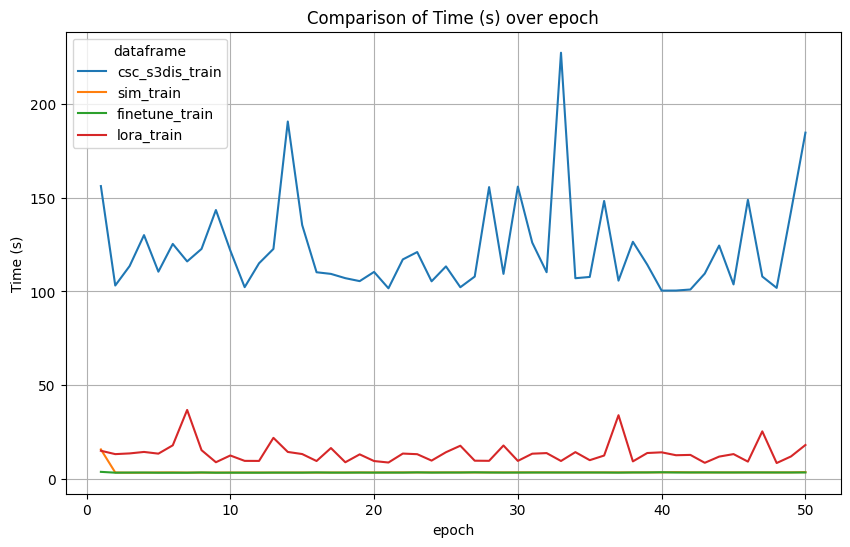

In [24]:
column_to_compare = 'Time (s)'  # Loss Accuracy IoU Time (s)
dataframes = csv_to_df(file_paths)
plot_compare(dataframes,column_to_compare)